# ESCUELA POLITÉCNICA NACIONAL

![](logoEpn.jpg){width=3cm height=3cm fig-align="center"}

# Taller 05: Mínimos cuadrados

## A)  Interpole los puntos:

$$
\begin{aligned}
p1 &= (5.4, 3.2) \\
p2_i &= (9.5, 0.7) \\
p3 &= (12.3, -3.6)
\end{aligned}
$$

De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos. 

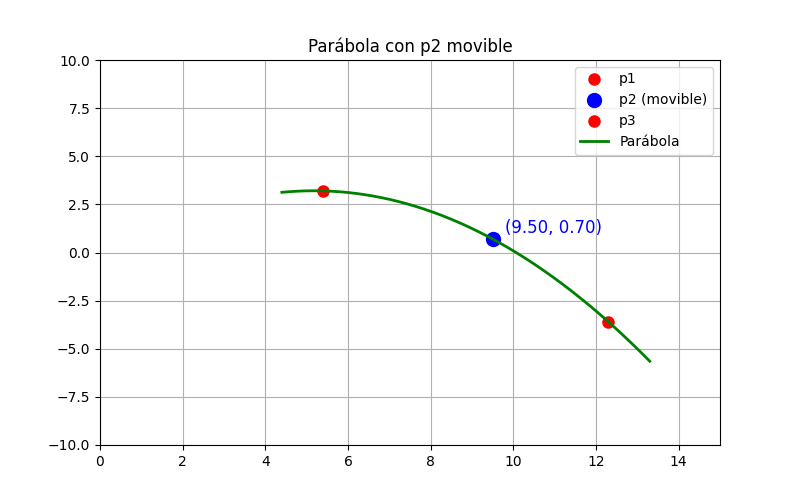

In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

# Puntos
p1 = np.array([5.4,  3.2])
p2 = np.array([9.5,  0.7]) # Punto movible
p3 = np.array([12.3, -3.6])

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlim(0, 15)
ax.set_ylim(-10, 10)
ax.grid(True)
ax.set_title("Parábola con p2 movible")

# Dibujar puntos con etiquetas
p1_plot, = ax.plot([p1[0]], [p1[1]], 'ro', markersize=8, label="p1")
p2_plot, = ax.plot([p2[0]], [p2[1]], 'bo', markersize=10, label="p2 (movible)")
p3_plot, = ax.plot([p3[0]], [p3[1]], 'ro', markersize=8, label="p3")

# Etiqueta para p2
label = ax.text(p2[0]+0.3, p2[1]+0.3,
                f"({p2[0]:.2f}, {p2[1]:.2f})",
                fontsize=12, color="blue")

# Curva de la parábola
curve, = ax.plot([], [], 'g-', lw=2, label="Parábola")

# Mostrar leyenda
ax.legend()

dragging = False

def update_curve():
    xs = [p1[0], p2[0], p3[0]]
    ys = [p1[1], p2[1], p3[1]]

    a, b, c = np.polyfit(xs, ys, 2)

    xr = np.linspace(min(xs)-1, max(xs)+1, 400)
    yr = a * xr**2 + b * xr + c

    curve.set_data(xr, yr)
    fig.canvas.draw_idle()

update_curve()

# Funciones de interacción con el mouse
def near_point(event, px, py, tol=0.3):
    """Verifica si el mouse está cerca del punto (px, py)"""
    if event.xdata is None: 
        return False
    return abs(event.xdata - px) < tol and abs(event.ydata - py) < tol

def on_press(event):
    global dragging
    if event.inaxes != ax:
        return
    if near_point(event, p2[0], p2[1]):
        dragging = True

def on_motion(event):
    global dragging, p2
    if not dragging:
        return
    if event.xdata is None:
        return

    # Actualizar posición
    p2[0], p2[1] = event.xdata, event.ydata
    p2_plot.set_data([p2[0]], [p2[1]])

    # Actualizar texto
    label.set_position((p2[0] + 0.3, p2[1] + 0.3))
    label.set_text(f"({p2[0]:.2f}, {p2[1]:.2f})")

    update_curve()

def on_release(event):
    global dragging
    dragging = False

fig.canvas.mpl_connect("button_press_event", on_press)
fig.canvas.mpl_connect("motion_notify_event", on_motion)
fig.canvas.mpl_connect("button_release_event", on_release)

plt.show()

## B) Interpole el siguiente conjunto de datos:

$$
\begin{aligned}
xs &= 0.0003,\ 0.0822,\ 0.2770,\ 0.4212,\ 0.4403,\ 0.5588, \\
&\quad 0.5943,\ 0.6134,\ 0.9070,\ 1.0367,\ 1.1903,\ 1.2511,\ 1.2519, \\
&\quad 1.2576,\ 1.6165,\ 1.6761,\ 2.0114,\ 2.0557,\ 2.1610,\ 2.6344 \\
\\[-4pt]
ys &= 1.1017,\ 1.5021,\ 0.3844,\ 1.3251,\ 1.7206,\ 1.9453, \\
&\quad 0.3894,\ 0.3328,\ 1.2887,\ 3.1239,\ 2.1778,\ 3.1078,\ 4.1856, \\
&\quad 3.3640,\ 6.0330,\ 5.8088,\ 10.5890,\ 11.5865,\ 11.8221,\ 26.5077
\end{aligned}
$$

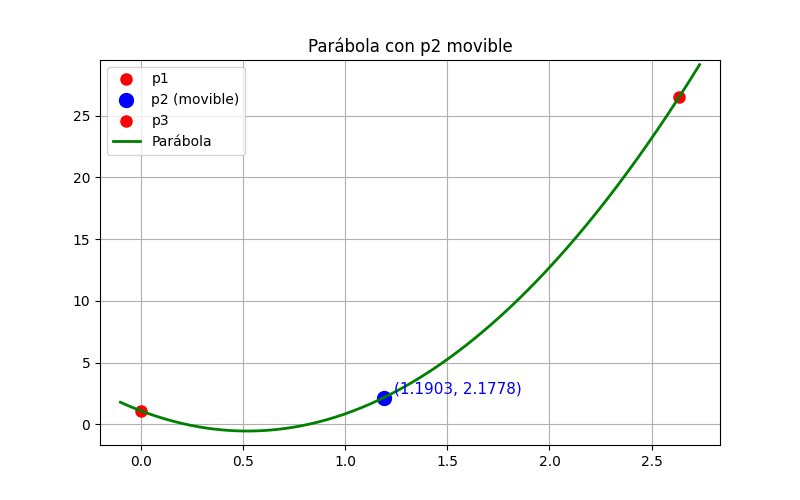

In [3]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

# Datos
xs = np.array([ 
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588,
    0.5943, 0.6134, 0.9070, 1.0367, 1.1903, 1.2511, 1.2519,
    1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 2.1610, 2.6344
])

ys = np.array([ 
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453,
    0.3894, 0.3328, 1.2887, 3.1239, 2.1778, 3.1078, 4.1856,
    3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 11.8221, 26.5077  
])

# Puntos fijos
p1 = np.array([xs[0], ys[0]])
p2 = np.array([xs[10], ys[10]]) # punto intermedio movible
p3 = np.array([xs[-1], ys[-1]])

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlim(xs.min() - 0.2, xs.max() + 0.2)
ax.set_ylim(ys.min() - 2, ys.max() + 3)

ax.grid(True)
ax.set_title("Parábola con p2 movible")

# Puntos con etiquetas
p1_plot, = ax.plot([p1[0]], [p1[1]], 'ro', markersize=8, label="p1")
p2_plot, = ax.plot([p2[0]], [p2[1]], 'bo', markersize=10, label="p2 (movible)")
p3_plot, = ax.plot([p3[0]], [p3[1]], 'ro', markersize=8, label="p3")

# Etiqueta para p2
label = ax.text(
    p2[0] + 0.05,
    p2[1] + 0.3,
    f"({p2[0]:.4f}, {p2[1]:.4f})",
    fontsize=11,
    color="blue"
)

# Curva de la parábola
curve, = ax.plot([], [], 'g-', lw=2, label="Parábola")

ax.legend()

def update_curve():
    xs_fit = [p1[0], p2[0], p3[0]]
    ys_fit = [p1[1], p2[1], p3[1]]

    a, b, c = np.polyfit(xs_fit, ys_fit, 2)

    xr = np.linspace(min(xs_fit)-0.1, max(xs_fit)+0.1, 400)
    yr = a * xr**2 + b * xr + c

    curve.set_data(xr, yr)
    fig.canvas.draw_idle()

update_curve()

# Funciones de interacción
def near_point(event, px, py, tol=0.3):
    if event.xdata is None:
        return False
    return (
        abs(event.xdata - px) < tol and
        abs(event.ydata - py) < tol
    )

dragging = False

def on_press(event):
    global dragging
    if event.inaxes != ax:
        return
    if near_point(event, p2[0], p2[1]):
        dragging = True

def on_motion(event):
    global dragging, p2
    if not dragging:
        return
    if event.xdata is None:
        return

    p2[0], p2[1] = event.xdata, event.ydata
    p2_plot.set_data([p2[0]], [p2[1]])

    label.set_position((p2[0] + 0.05, p2[1] + 0.3))
    label.set_text(f"({p2[0]:.4f}, {p2[1]:.4f})")

    update_curve()

def on_release(event):
    global dragging
    dragging = False

fig.canvas.mpl_connect("button_press_event", on_press)
fig.canvas.mpl_connect("motion_notify_event", on_motion)
fig.canvas.mpl_connect("button_release_event", on_release)

plt.show()

## Link del repositorio GitHub

[github_TamyBenavidez](https://github.com/TamyBenavidez/MN/tree/main/Taller/Taller05), Taller N°5